For this project, we have used CRISP-DM in the data science process

## 1. BUSINESS UNDERSTANDING

=== 

Reference questions:

Good questions for this stage include:

- Who are the stakeholders in this project? Who will be directly affected by the creation of this project?
- What business problem(s) will this Data Science project solve for the organization?
- What problems are inside the scope of this project?
- What problems are outside the scope of this project?
- What data sources are available to us?
- What is the expected timeline for this project? Are there hard deadlines (e.g. "must be live before holiday season shopping") or is this an ongoing project?
- Do stakeholders from different parts of the company or organization all have the exact same understanding about what this project is and isn't?

===

Goal

* It is our job to predict the sales price for each house. For each ID in the test set, we will predict the value of the SalePrice variable. 

Metric

* Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

#### Steps undertaken

Comprehensive Data Exploration with Python

* Understand how variables are distributed and how they interact
* Apply different transformations before training machine learning models

House Prices EDA

* Use visualization techniques to study missing data and distributions
* Include correlation heatmaps, pairplots, and t-SNE to help inform appropriate inputs to a linear model

A Study on Regression Applied to the Ames Dataset
* Demonstrate effective tactics for feature engineering
* Explore linear regression with different regularization methods including ridge, LASSO, and ElasticNet using scikit-learn

Regularized Linear Models

* Build a basic linear model and more advanced algorithms

## 2. DATA UNDERSTANDING

===

Consider the following questions when working through this stage:

- What data is available to us? Where does it live? Do we have the data, or can we scrape/buy/source the data from somewhere else?
- Who controls the data sources, and what steps are needed to get access to the data?
What is our target?
- What predictors are available to us?
- What data types are the predictors we'll be working with?
- What is the distribution of our data?
- How many observations does our dataset contain? Do we have a lot of data? Only a little?
- Do we have enough data to build a model? Will we need to use resampling methods?
- How do we know the data is correct? How is the data collected? Is there a chance the data could be wrong?

===

In [982]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm


from scipy import stats
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder



#### Load the dataset

In [983]:
#Read dataset and check shape
df_train = pd.read_csv("./Data/train.csv")
df_test = pd.read_csv("./Data/test.csv")
df_sample = pd.read_csv("./Data/sample_submission.csv")
print("Full train dataset shape is {}".format(df_train.shape))
print("Full test dataset shape is {}".format(df_test.shape))
print("Full sample_submission dataset shape is {}".format(df_sample.shape))

Full train dataset shape is (1460, 81)
Full test dataset shape is (1459, 80)
Full sample_submission dataset shape is (1459, 2)


In [984]:
df_train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [985]:
df_test.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [986]:
df_sample.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [987]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [988]:
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [989]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [990]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [991]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [992]:
df_sample.describe()

,Id,SalePrice
count,1459.000000,1459.000000
mean,2190.000000,179183.918243
std,421.321334,16518.303051
min,1461.000000,135751.318893
25%,1825.500000,168703.011202
50%,2190.000000,179208.665698
75%,2554.500000,186789.409363
max,2919.000000,281643.976117


## 3. DATA PREPARATION

===

During this stage, we'll want to handle the following issues:

- Detecting and dealing with missing values
- Data type conversions (e.g. numeric data mistakenly encoded as strings)
- Checking for and removing multicollinearity (correlated predictors)
- Normalizing our numeric data
- Converting categorical data to numeric format through one-hot encoding

===

#### Dropping columns with null values of 50% or more

In [993]:
# Calculate the percentage of null values per column
null_percentage = (df_train.isnull().sum() / len(df_train)) * 100

# Identify columns with more than 50% null values
columns_to_drop_train = null_percentage[null_percentage > 50].index

# Drop those columns from the DataFrame
df_train_cleaned = df_train.drop(columns=columns_to_drop_train)

# check if cleaned dataset has nulls of less than 50%
(df_train_cleaned.isnull().sum() / len(df_train_cleaned) * 100).sort_values(ascending=False)

FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
                  ...    
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
Heating          0.000000
MSSubClass       0.000000
SalePrice        0.000000
Length: 76, dtype: float64

In [994]:
# Calculate the percentage of null values per column
null_percentage = (df_test.isnull().sum() / len(df_test)) * 100

# Identify columns with more than 50% null values
columns_to_drop_test = null_percentage[null_percentage > 50].index

# Drop those columns from the DataFrame
df_test_cleaned=df_test.drop(columns=columns_to_drop_test)

# check if cleaned dataset has nulls of less than 50%
(df_test_cleaned.isnull().sum() / len(df_test_cleaned) * 100).sort_values(ascending=False)

LotFrontage      15.558602
GarageYrBlt       5.346127
GarageFinish      5.346127
GarageQual        5.346127
GarageCond        5.346127
                   ...    
CentralAir        0.000000
Electrical        0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
SaleCondition     0.000000
Length: 74, dtype: float64

* Data/sample_submission.csv has nill null values

#### Replacing missing values

In [995]:
#Replacing null values in df_train_cleaned
for col in df_train_cleaned.columns:

  if df_train_cleaned[col].dtype == 'object':

    df_train_cleaned[col] = df_train_cleaned[col].fillna(df_train_cleaned[col].mode()[0])

  else:

    df_train_cleaned[col] = df_train_cleaned[col].fillna(df_train_cleaned[col].median())
(df_train_cleaned.isnull().sum() / len(df_train_cleaned) * 100).sort_values(ascending=False)

Id             0.0
HalfBath       0.0
FireplaceQu    0.0
Fireplaces     0.0
Functional     0.0
              ... 
MasVnrArea     0.0
Exterior2nd    0.0
Exterior1st    0.0
RoofMatl       0.0
SalePrice      0.0
Length: 76, dtype: float64

In [996]:
#Replacing null values in df_test_cleaned
for col in df_test_cleaned.columns:

  if df_test_cleaned[col].dtype == 'object':

    df_test_cleaned[col] = df_test_cleaned[col].fillna(df_test_cleaned[col].mode()[0])

  else:

    df_test_cleaned[col] = df_test_cleaned[col].fillna(df_test_cleaned[col].median())
(df_test_cleaned.isnull().sum() / len(df_test_cleaned) * 100).sort_values(ascending=False)

Id               0.0
GarageType       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
                ... 
MasVnrArea       0.0
Exterior2nd      0.0
Exterior1st      0.0
RoofMatl         0.0
SaleCondition    0.0
Length: 74, dtype: float64

#### Visualise distribution of DataFrames

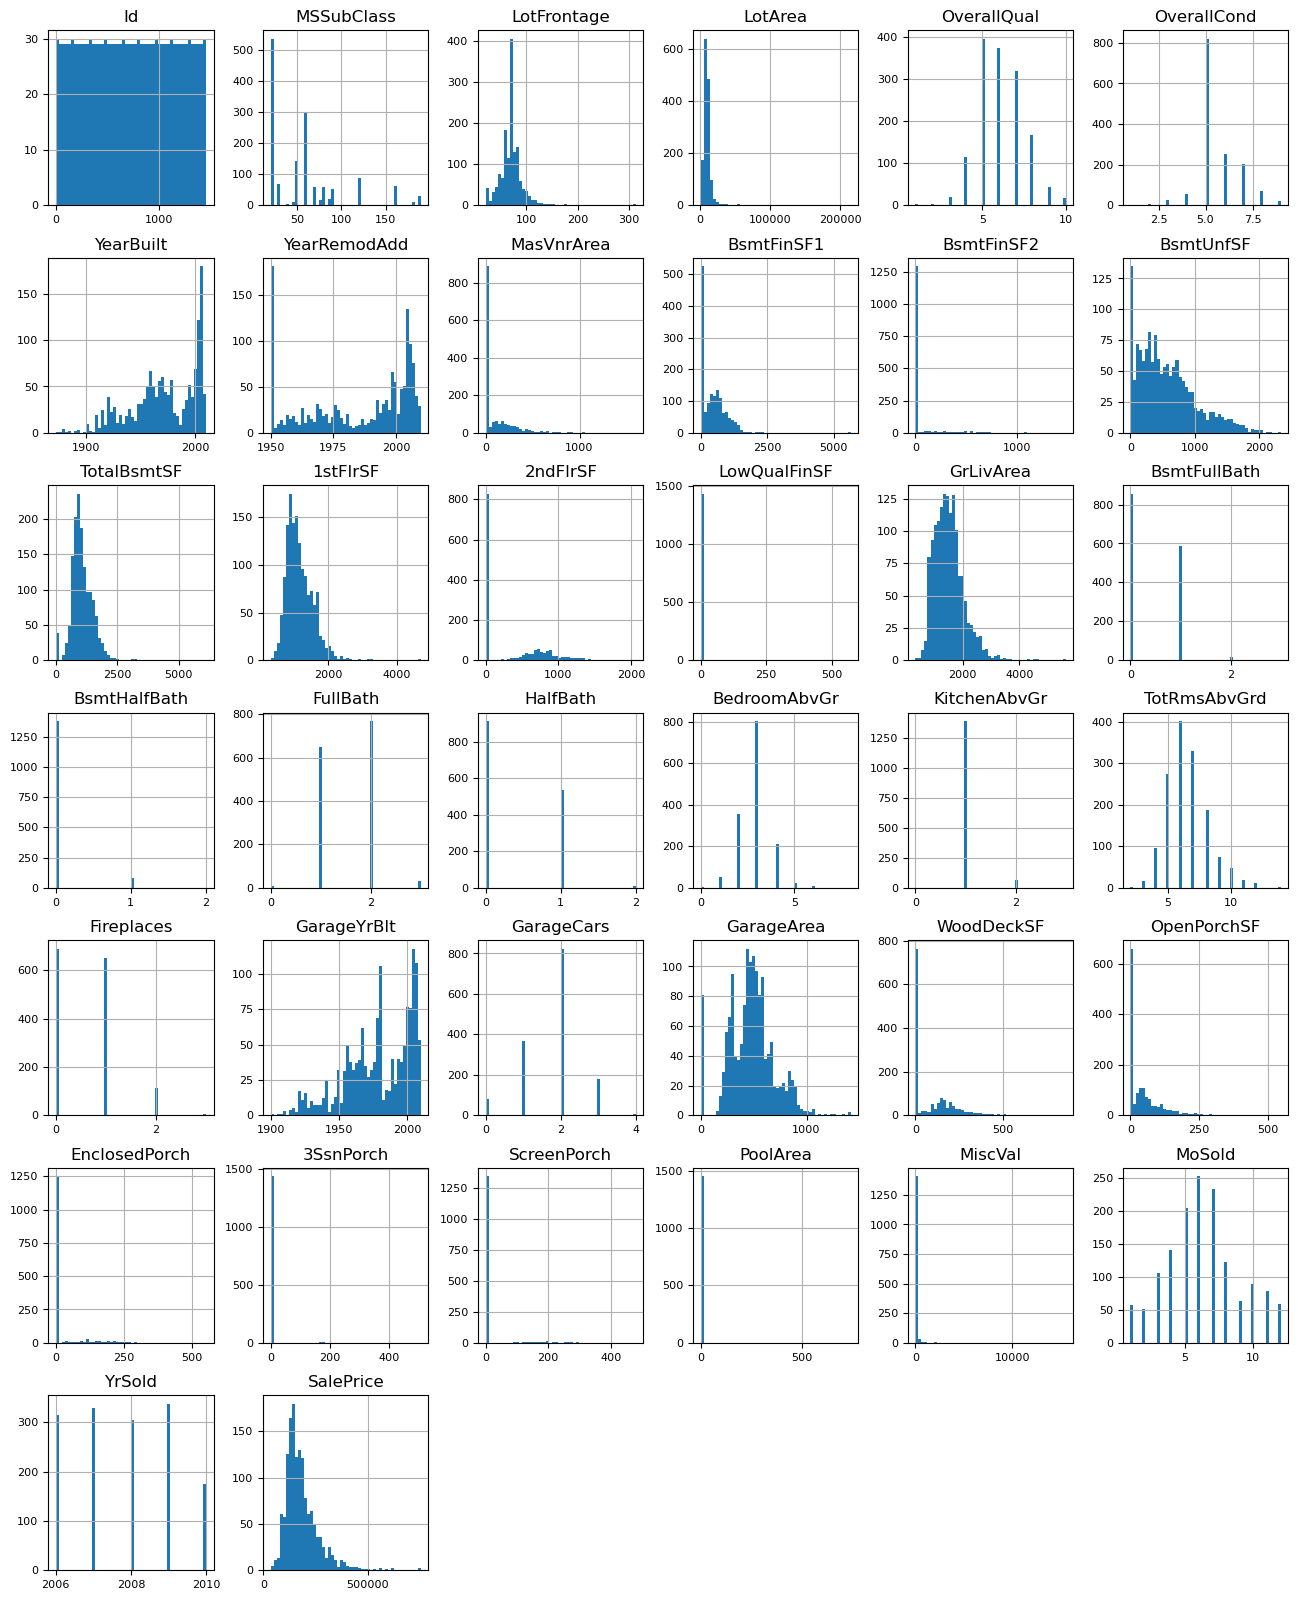

In [997]:
df_train_cleaned.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

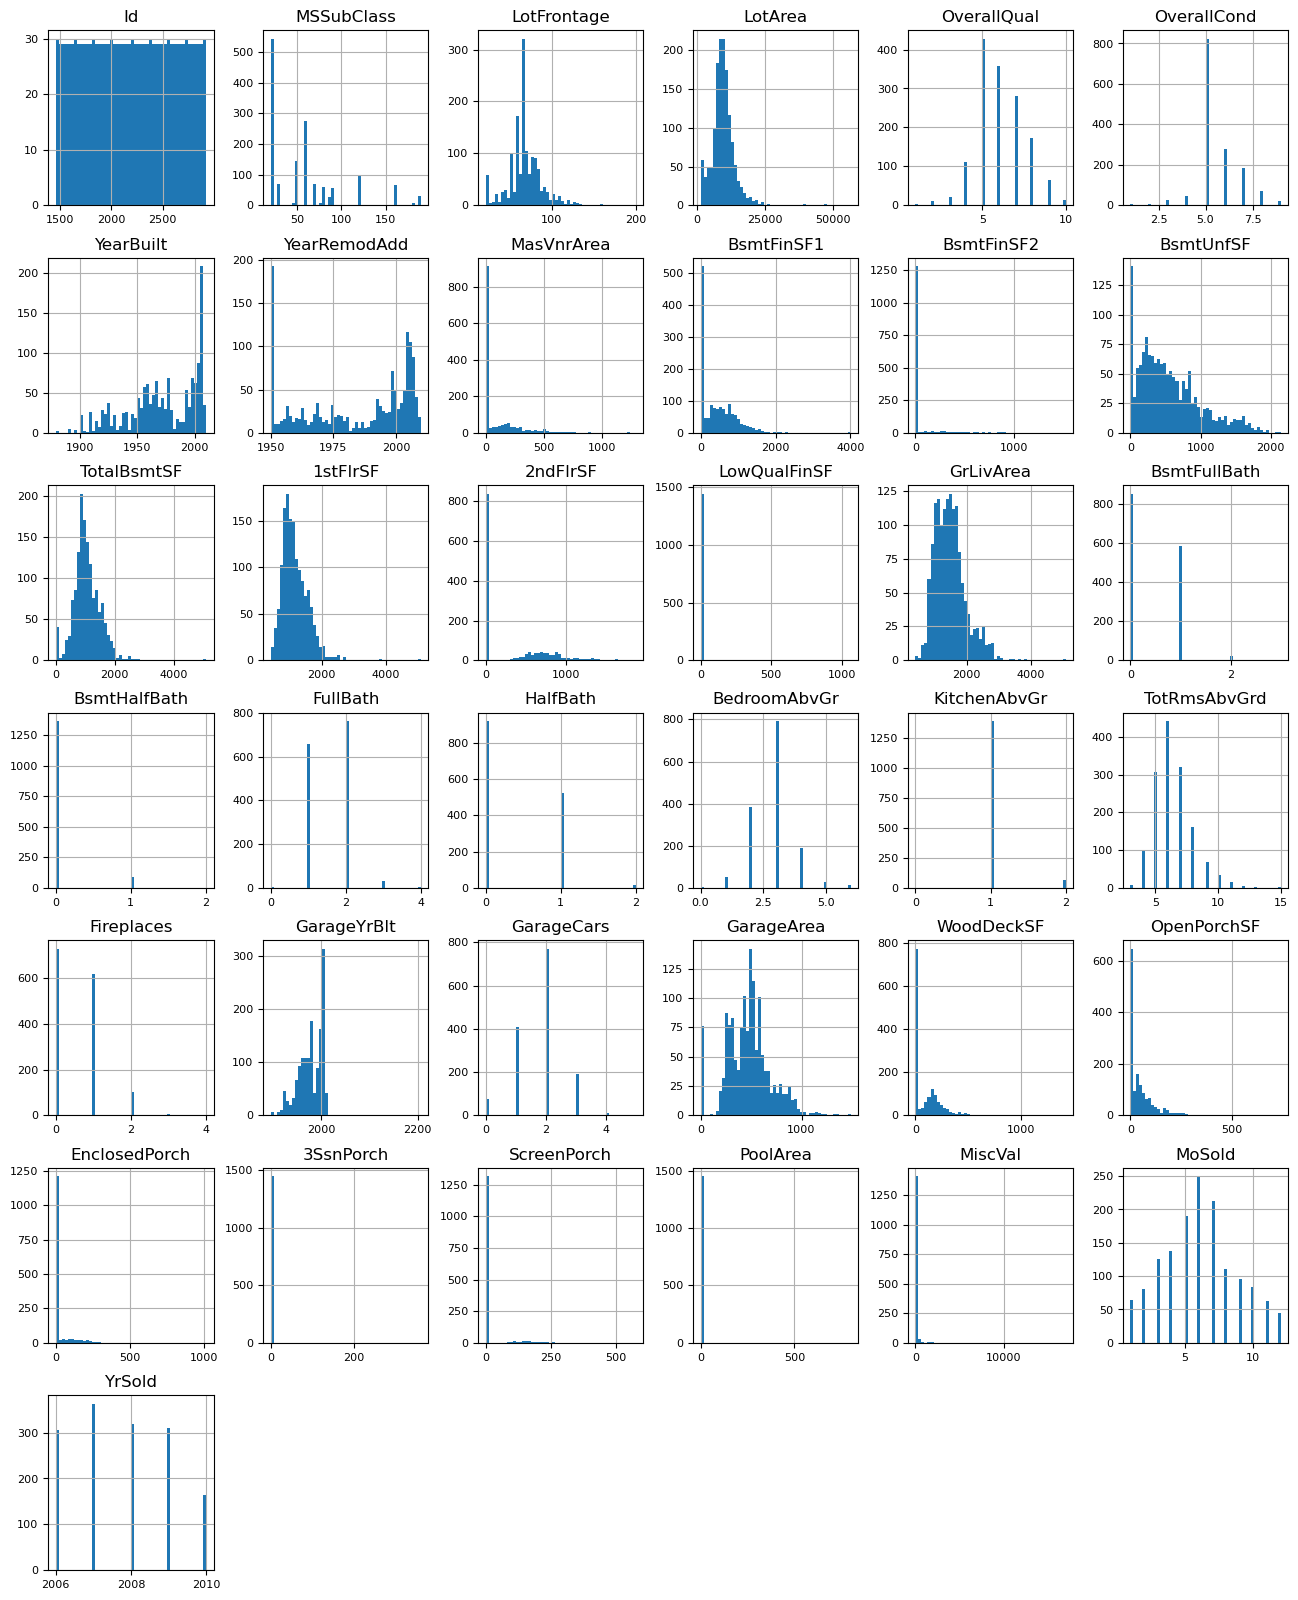

In [998]:
df_test_cleaned.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

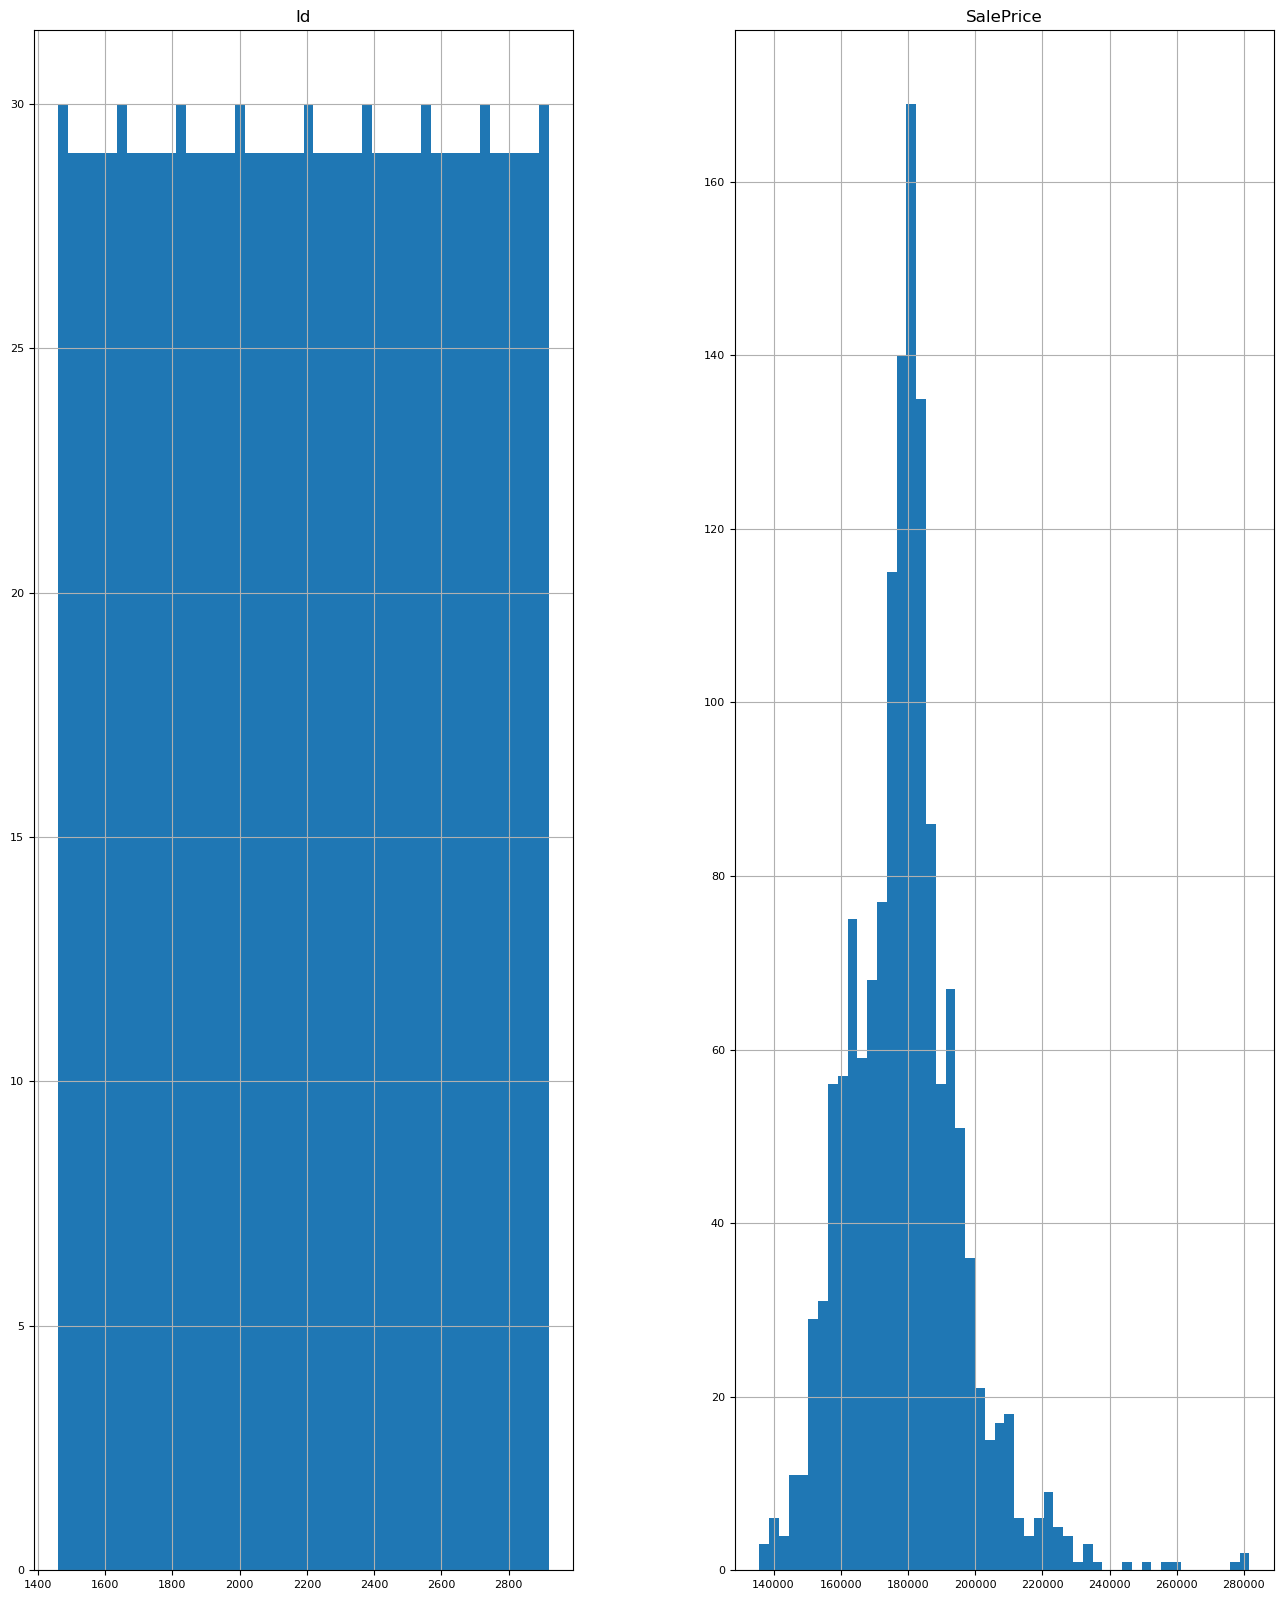

In [999]:
df_sample.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

#### Summary statistics for the numeric columns in the DataFrames

In [1000]:
df_test_cleaned.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.334476,9819.161069,6.078821,5.553804,1971.357779,1983.662783,99.673749,439.142906,...,472.773818,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,20.569211,4955.517327,1.436812,1.113740,30.390071,21.130467,177.001792,455.117812,...,216.974247,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,60.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,78.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,162.000000,752.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [1001]:
df_train_cleaned.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1002]:
df_sample.describe()

,Id,SalePrice
count,1459.000000,1459.000000
mean,2190.000000,179183.918243
std,421.321334,16518.303051
min,1461.000000,135751.318893
25%,1825.500000,168703.011202
50%,2190.000000,179208.665698
75%,2554.500000,186789.409363
max,2919.000000,281643.976117


In [1003]:
# sns.boxplot(data=df_train_cleaned, x="LotFrontage", y="SalePrice")
# plt.xticks(rotation=90)
# plt.show()

In [1004]:
# Visualise a pairplot for all columns with numerical values in the DataFrame
#sns.pairplot(df_train_cleaned)

# Show the plot
#plt.show()

In [1005]:
# sns.pairplot(df_train_cleaned)

# plt.suptitle("Pairplot showing Correlation of all the columns in the df_train DataFrame",y=1.02);

#### Correlation analysis

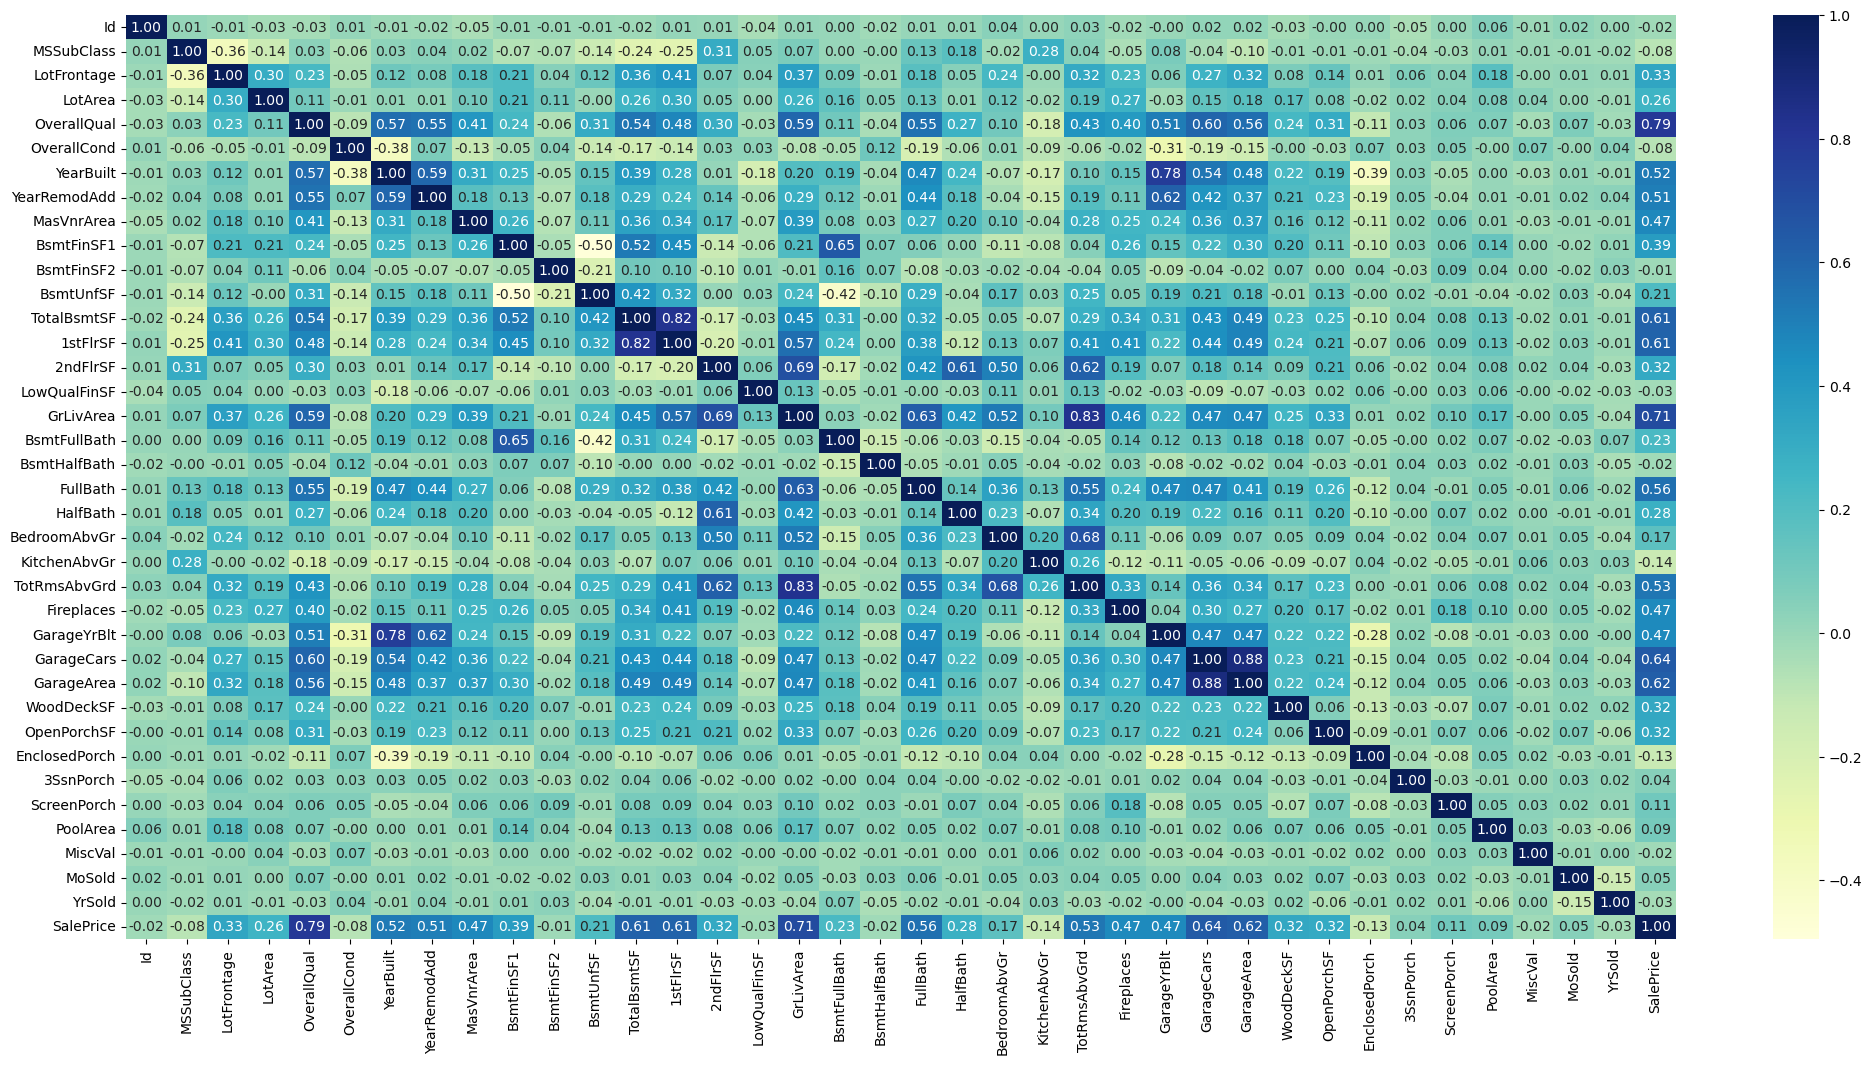

In [1006]:
# Compute correlation for all numeric columns in DataFrames
corr_trained = df_train_cleaned.corr(numeric_only=True)
plt.figure(figsize=(25,12))
sns.heatmap(corr_trained,annot=True,cmap="YlGnBu", fmt=".2f");

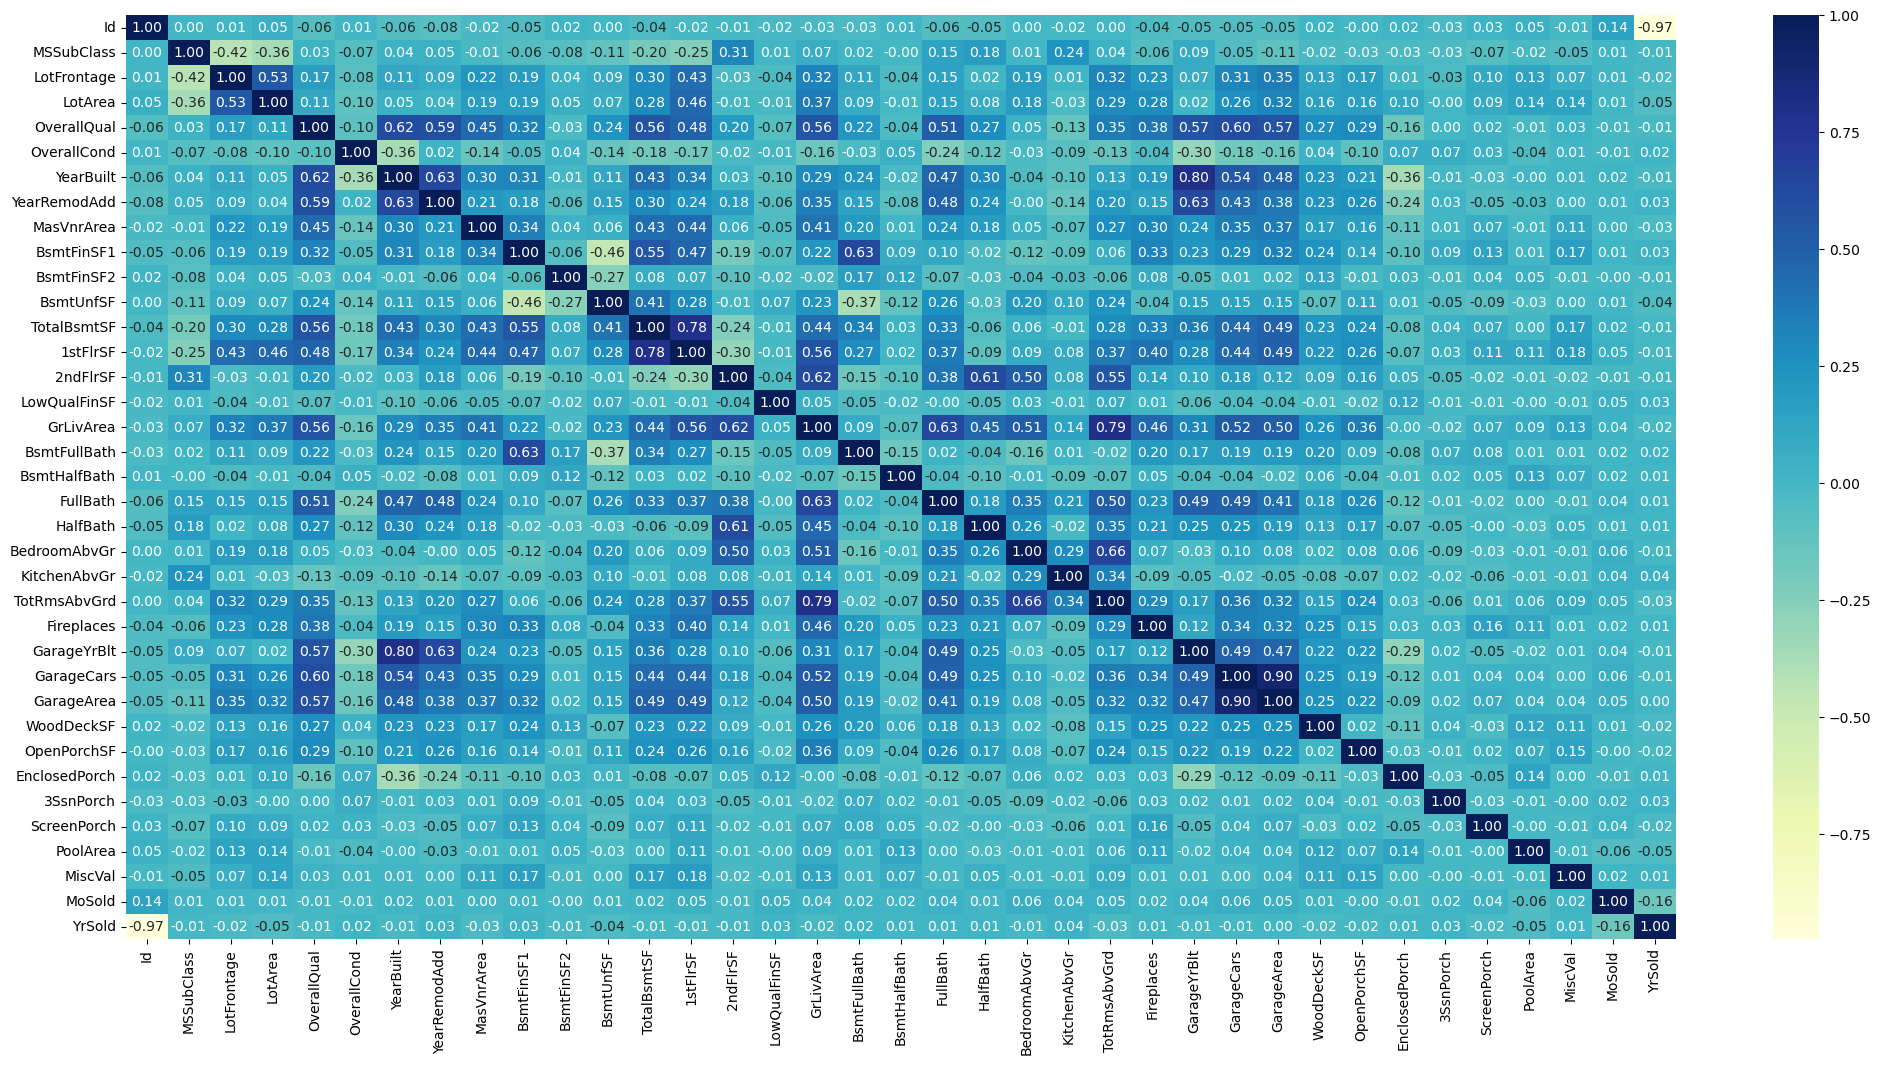

In [1007]:
# Compute correlation for all numeric columns in DataFrames
corr_test = df_test_cleaned.corr(numeric_only=True)
plt.figure(figsize=(25,12))
sns.heatmap(corr_test,annot=True, cmap="YlGnBu", fmt=".2f");

<Axes: xlabel='SalePrice', ylabel='Count'>

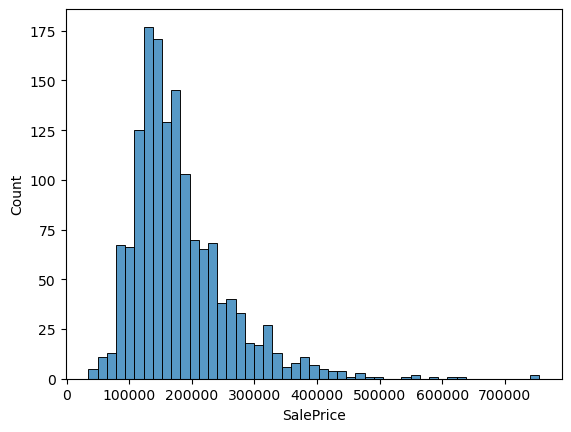

In [1008]:
sns.histplot(df_train_cleaned, x=df_train_cleaned["SalePrice"])

#### Drop FireplaceQu in df_train_cleaned as its missing in the df_test_cleaned

In [1009]:
df_train_cleaned = df_train_cleaned.drop('FireplaceQu', axis=1)

In [1010]:
caterogorical_cols=df_train_cleaned.select_dtypes(include=['object']).columns
caterogorical_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [1011]:
caterogorical_cols_test=df_test_cleaned.select_dtypes(include=['object']).columns
caterogorical_cols_test

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [1012]:
num_cols=df_train_cleaned.select_dtypes(include=["int64","float64"]).columns
num_cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [1013]:
num_cols_test=df_test_cleaned.select_dtypes(include=["int64","float64"]).columns
num_cols_test

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [1014]:
y_train=df_train_cleaned["SalePrice"]
X=df_train_cleaned[['GrLivArea','OverallQual','MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']]
X=pd.get_dummies(X, columns=caterogorical_cols, drop_first=True,dtype=int)


### Transform

In [1015]:
# Run this cell without changes
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder

num_cols = ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 
       'GarageCars', 'GarageArea', 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch', 
       '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold']
caterogorical_cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
        'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']

# Instantiate transformers
log_transformer = FunctionTransformer(np.log, validate=True)
ohe = OneHotEncoder(drop='first', sparse_output=False)

# Fit transformers
log_transformer.fit(df_train_cleaned[num_cols])
ohe.fit(df_train_cleaned[caterogorical_cols])

# Transform training data
X_train = pd.concat([
    pd.DataFrame(log_transformer.transform(df_train_cleaned[num_cols]), index=df_train_cleaned.index),
    pd.DataFrame(ohe.transform(df_train_cleaned[caterogorical_cols]), index=df_train_cleaned.index)
], axis=1)

# Transform test data
X_test = pd.concat([
    pd.DataFrame(log_transformer.transform(df_test_cleaned[num_cols]), index=df_test_cleaned.index),
    pd.DataFrame(ohe.transform(df_test_cleaned[caterogorical_cols]), index=df_test_cleaned.index)
], axis=1)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:394: RuntimeWarning: divide by zero encountered in log
  return func(X, **(kw_args if kw_args else {}))
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:394: RuntimeWarning: divide by zero encountered in log
  return func(X, **(kw_args if kw_args else {}))


## 4. MODELLING

===

We considered the following questions during the modeling step:

- Is this a classification task? A regression task? Something else?
- What models will we try?
- How do we deal with overfitting?
- Do we need to use regularization or not?
- What sort of validation strategy will we be using to check that our model works well on unseen data?
- What loss functions will we use?
- What threshold of performance do we consider as successful?

===

### A: Build a Multiple Regression Model with chosen predictors

In [1016]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     67.50
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        14:20:04   Log-Likelihood:                -16767.
No. Observations:                1460   AIC:                         3.393e+04
Df Residuals:                    1264   BIC:                         3.496e+04
Df Model:                         195                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.875e+

## 5. EVALUATION AND VALIDATION

- During this step, we'll evaluate the results of our modeling efforts. Does our model solve the problems that we outlined all the way back during step 1?
- Generate Predictions on Training and Test Sets

In [1017]:
# Check if there are any infinity values in X_train
if np.any(np.isinf(X_train)):
    print("There are infinity values in X_train.")
if np.any(np.isinf(X_test)):
    print("There are infinity values in X_test.")

# You can also print the indices of rows/columns containing infinities:
print("Rows/columns with infinity values:")
print(np.where(np.isinf(X_train)))
# Cap values to a threshold, e.g., 1e10
X_train[X_train > 1e10] = 1e10
X_train[X_train < -1e10] = -1e10

X_test[X_test > 1e10] = 1e10
X_test[X_test < -1e10] = -1e10

There are infinity values in X_train.
There are infinity values in X_test.
Rows/columns with infinity values:
(array([   0,    0,    0, ..., 1459, 1459, 1459], dtype=int64), array([10, 15, 18, ..., 31, 32, 33], dtype=int64))


In [1018]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

### B: Error-Based Metric (mean_absolute_erro)

In [1019]:
y_pred = results.predict(sm.add_constant(X))
mean_absolute_error(y_train, y_pred)

15629.67491840027

## Insights

Our model is statistically significant overall, and explains about 91% of the
variance in SalePrice. On average it is off by about $15.6k in its predictions
of home price.

- All of our coefficients are statistically significant

So we can say that:
    
- GrLivArea: For each increase of 1 sqft in above-grade living area, we see an
           associated increase of about $75.73 in sale price

- OverallQual: For each increase of 1 in overall quality, we see an associated
             increase of about $8,324.69 in sale price




In [1020]:
X_sklearn = df_train_cleaned[['GrLivArea', 'OverallQual', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']].copy()

X_cat = X_sklearn[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']]

X_numeric = X_sklearn.drop(
    ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 
     'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
     'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
     'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
     'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
     'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
     'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
     'PavedDrive', 'SaleType', 'SaleCondition'], axis=1)

# Fit the OneHotEncoder
ohe = OneHotEncoder(drop="first", sparse_output=False)
ohe.fit(X_cat)

# Transform the categorical data and create the DataFrame
X_cat_ohe = pd.DataFrame(
    data=ohe.transform(X_cat),
    columns=[f"{col}_{cat}" for col, cats in zip(X_cat.columns, ohe.categories_) for cat in cats[1:]],  
    index=X_cat.index
)

X_cat_ohe


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1456,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1457,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1458,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [1021]:
X_sklearn_final = pd.concat([X_numeric, X_cat_ohe], axis=1)
X_sklearn_final

,GrLivArea,OverallQual,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1710,7,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1262,6,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1786,7,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1717,7,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2198,8,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1647,6,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1456,2073,6,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1457,2340,7,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1458,1078,5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [1022]:
lr = LinearRegression()
lr.fit(X_sklearn_final, y)

LinearRegression()

In [1023]:
print(results.params.values)
print(np.append(lr.intercept_, lr.coef_))

[-4.87476252e+05  7.38772794e+01  8.00731458e+03  3.93496802e+03
  3.48061700e+04  3.10945080e+04  3.24496168e+04  2.97381340e+04
  4.77860147e+03  7.04555466e+03  1.93381064e+04  9.48806415e+02
  1.01691214e+04  3.83263876e+03  7.53736873e+03 -1.99787017e+04
  1.06993438e+04 -9.46370573e+03 -1.32914190e+04 -2.48093565e+03
  5.16928484e+03 -1.20483477e+02  6.78409796e+03  1.01718463e+04
  2.51283498e+03 -2.95801054e+03  5.79057181e+02  1.84293447e+04
 -1.12314822e+04 -1.81004959e+03 -5.91549676e+03 -7.06629840e+03
 -8.10201152e+03 -7.97252380e+03  2.16302304e+04 -4.53601833e+03
  4.44557722e+04  3.53414494e+04 -1.15707492e+04 -9.64024897e+03
 -2.63874296e+03  2.96181967e+03  1.58587801e+04  4.69598753e+04
  2.98112428e+03  2.00830273e+04  2.41363917e+03  1.32889677e+04
  3.98278872e+03  4.67726050e+03 -8.02476708e+03  8.38336854e+03
  5.26934352e+03  1.55781719e+03  8.05457425e+03  1.44984049e+04
  5.27940746e+04 -1.79696042e+05 -4.73284151e+04  7.20616889e+03
  4.42558305e+04 -1.07101

In [1024]:
mean_absolute_error(y, lr.predict(X_sklearn_final))

15680.196362292554

In [1025]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train, y)

LinearRegression()

LinearRegression()